## Wine Quality Prediction 
**Binary Classification: Good Wine vs Bad Wine**

### Objective:
The goal of this project is to build a complete Machine Learning pipeline using a real-world dataset. The task is to predict whether a wine sample is Good (quality ≥ 7) or Bad (quality < 7) based on its chemical properties.

**This notebook covers the full ML workflow including:**

Dataset understanding

Data inspection and cleaning

Exploratory Data Analysis (EDA)

Feature engineering

Model training & evaluation

Model comparison

Hyperparameter tuning using Pipeline + GridSearchCV

### TASK 1: Load and Understand the Dataset
**Introduction**

In this task, the dataset winequality.csv was loaded using Pandas to understand its structure. This dataset contains wine samples with different chemical properties, and our goal is to predict wine quality using these features.

**Result / Findings**

The dataset contains numerical chemical measurement features such as acidity, sugar, sulphates, pH, and alcohol.

Each row represents one wine sample.

Each column represents a chemical property, and the column quality represents the wine quality score given to that sample.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### TASK 2: Basic Data Inspection
**Introduction**

Before applying Machine Learning algorithms, it is important to inspect the dataset. This helps identify the dataset size, column names, data types, and the overall statistical distribution of data.

**Result / Findings**

The dataset has 1599 rows and 12 columns.

All columns are numerical.

The target variable is quality, which contains wine quality scores.

**Why Data Inspection is Important**

Data inspection is important because it helps us:

understand the structure of the dataset,

identify datatype issues,

detect unusual values,

and plan preprocessing steps before model training.

In [5]:
df.shape

(1599, 12)

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### TASK 3: Missing Values Analysis
**Introduction**

Missing values can reduce model accuracy or create bias in predictions. In real-world projects, handling missing data properly is critical.

**Result / Findings**

After checking the dataset using isnull() and isnull().sum(), it was found that:
There are no missing values in the dataset (0 null values).

**Real-world Handling (If missing values existed)**

If missing values were present, we could handle them by:

removing missing rows (if very few),

imputing values using mean/median (for numerical features),

or using model-based imputation in advanced cases.

In [7]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### TASK 4: Exploratory Data Analysis (EDA)
**Introduction**

EDA helps understand the distribution of the target variable and identify patterns in the dataset. Here, we focused on analyzing the quality column.

**Result / Findings** 

The value counts of wine quality are:

Quality 3: 10

Quality 4: 53

Quality 5: 681

Quality 6: 638

Quality 7: 199

Quality 8: 18

**Observations**

The dataset is heavily concentrated around quality scores 5 and 6, meaning most wines are average quality.

Very few wines have extreme ratings like 3 or 8, showing fewer samples of poor and excellent wines.

The dataset is not uniformly distributed, which can affect model performance.

**Why EDA is Helpful**

EDA helps before training because it:

reveals imbalance and skewness,

shows whether enough samples exist for each class,

and helps choose the right ML approach.

In [19]:
df["quality"].value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

C:\Users\Ganji Niharika\AppData\Local\Temp\ipykernel_12696\1788410844.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality", data=df, palette=custom_colors)


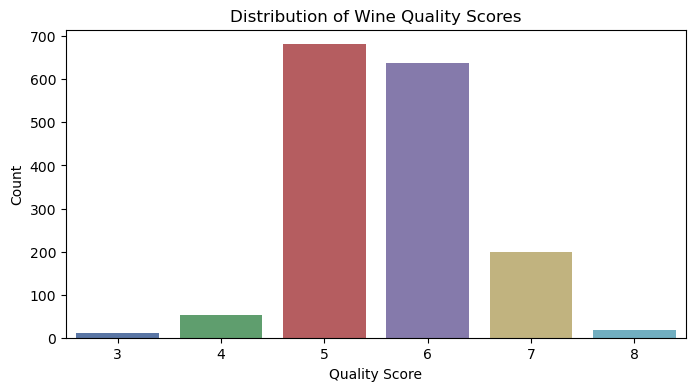

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
custom_colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B3", "#CCB974", "#64B5CD"]

plt.figure(figsize=(8,4))
sns.countplot(x="quality", data=df, palette=custom_colors)
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

### TASK 5: Convert the Problem into a Classification Task
**Introduction**

Predicting exact wine quality is a binary classification problem and can be difficult. In practical systems, businesses often only care whether a wine is “good” or “bad”, so we convert it into a binary target label based on the quality scores.

**Result / Findings**

A new column quality_label was created using this rule:

quality ≥ 7 → Good Wine (1)

quality < 7 → Bad Wine (0)

**After conversion:**

Bad Wine (0): 1382 samples

Good Wine (1): 217 samples

**Why Binary Classification is More Useful**

Binary classification is useful because:

it’s easier to deploy and interpret,

decision-making becomes clearer,

and it matches real-world needs like recommending good wines.

In [20]:
 df["quality_label"] = (df["quality"] >= 7).astype(int)

In [21]:
df[["quality", "quality_label"]].head(10)

,quality,quality_label
0,5,0
1,5,0
2,5,0
3,6,0
4,5,0
5,5,0
6,5,0
7,7,1
8,7,1
9,5,0


In [17]:
df["quality_label"].value_counts()

quality_label
0    1382
1     217
Name: count, dtype: int64

### TASK 6: Feature and Target Separation
**Introduction**

Machine Learning requires separating input variables (features) and output variable (target). Here we define features X and label y.

**Result / Findings**

X (features): All chemical properties

y (target): quality_label

**Why Not Use quality as Input Feature**

The original quality column is the true output/label. Using it as a feature would cause data leakage, meaning the model would cheat by learning directly from the answer.

In [22]:
X = df.drop(columns=["quality", "quality_label"])
y = df["quality_label"]
X.head(), y.head()

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  
 0      9.4  
 1      9.8  
 2      9.8  
 3      9.8  
 4

### TASK 7: Train–Test Split
**Introduction**

To test how well the model performs on unseen data, we split the dataset into training and testing sets.

**Result / Findings**

The dataset was split into:

Training set: 80%

Testing set: 20%

random_state = 42 was used for reproducibility.

**Why do we split data into training and testing sets?**

We split the dataset into training and testing sets so we can:

Train the model on the training data (learn patterns and relationships)

Evaluate the model on the testing data (check performance on unseen data)

This gives a realistic estimate of how the model will perform in the real world, where it will always receive new/unseen inputs.

**What problem occurs if we train and test on the same data?**

If we train and test on the same data, the model may:

Memorize the data instead of learning general patterns

Show artificially high accuracy

Fail badly on new data

#### This problem is called:

**Overfitting (and also "data leakage" in evaluation sense)**

Stratification ensures that both training and testing sets maintain the same class distribution, which is important for imbalanced datasets. This prevents overfitting and provides a realistic evaluation of model performance.

So basically:
Testing on training data = fake performance.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # 80% train, 20% test
    random_state=42,     # reproducibility
    stratify=y           # critical due to imbalance
)

In [27]:
y_train.value_counts(), y_test.value_counts()

(quality_label
 0    1109
 1     170
 Name: count, dtype: int64,
 quality_label
 0    273
 1     47
 Name: count, dtype: int64)

### TASK 8: Feature Scaling (StandardScaler) 
**Introduction**

**Why is Feature Scaling Important?**

Feature scaling is important because different features in the wine dataset have different value ranges.
Example:

pH values are around 3

total sulfur dioxide can go above 100

alcohol may range around 8–14

If we do not scale the features, the ML model may give more importance to large-range features, not because they are more important, but simply because their values are numerically bigger.

Scaling ensures that all features contribute equally and prevents models from being biased toward features with larger numeric ranges.

Scaling helps by: making all features comparable on the same scale, improving model stability, increasing training speed for some algorithms, improving accuracy for distance/optimization based models.

Note: Logistic Regression, KNN, and SVM require scaling, while tree-based models do not.

**Why Fit on Training Data Only?**

We fit StandardScaler only on training data because the scaler learns:

mean (average)

standard deviation

If we fit it on the full dataset (train + test), we are indirectly using information from the test set.

That causes data leakage, meaning the test data is no longer truly unseen.

**Correct approach:**

Fit scaler on train

Transform train

Transform test using same scaler

**Which ML Models Need Scaling and Why?**

Scaling is mainly needed for models that rely on:

**1) Distance-Based Algorithms**

These models use distance calculations (Euclidean, etc).
If features are not scaled, the feature with the largest range dominates the distance.

Examples:

KNN (K-Nearest Neighbors)

SVM (Support Vector Machine) (especially with RBF kernel)

**Why scaling matters:**
Because distance is affected heavily by feature magnitude.

**2) Gradient-Based Algorithms**

These models use gradient descent / optimization to find best parameters.

Examples:

Logistic Regression

SVM (Linear)

**Why scaling matters:**

Makes optimization faster

Makes coefficients stable

Helps converge properly

**Models That Do NOT Need Scaling**

Tree-based models do not depend on distance or gradients in the same way.

Examples:

Decision Tree

Random Forest

**Reason:**
Trees split based on conditions like:

alcohol > 10.5
Scaling does not change the order of values, so tree decisions remain mostly unaffected.

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled[:5]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828]])

### TASK 9: Model Training 
**Introduction**

In this task, multiple Machine Learning classification models are trained to predict whether a wine is Good (1) or Bad (0). Different algorithms learn patterns differently, so training several models allows us to compare performance and select the most suitable model for this dataset.

**Models Trained (with basic working explanation)**

**1) Logistic Regression (Scaled Data)**

Logistic Regression is a linear classification algorithm that predicts the probability of a sample belonging to a class using the sigmoid function. It finds a linear decision boundary that best separates Good and Bad wines.

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

lr_preds = lr.predict(X_test_scaled)

**2) K-Nearest Neighbors – KNN (Scaled Data)**

KNN is a distance-based model that classifies a wine by looking at the K closest samples in the training data. The final class is chosen based on the majority class among those neighbors.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

knn_preds = knn.predict(X_test_scaled)

**3) Support Vector Machine – SVM (Scaled Data)**

SVM works by finding the optimal separating boundary (hyperplane) between classes with the maximum margin. With kernels (like RBF), it can model complex non-linear boundaries.

In [38]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_scaled, y_train)

svm_preds = svm.predict(X_test_scaled)

**4) Decision Tree Classifier (Unscaled Data)**

A Decision Tree works by splitting the dataset into branches using if–else style rules on feature values. It creates a tree structure where each split is chosen to maximize class separation.

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_preds = dt.predict(X_test)

**5) Random Forest Classifier (Unscaled Data)**

Random Forest is an ensemble method that builds many decision trees and combines their predictions. It reduces overfitting compared to a single tree and generally provides better accuracy and stability.

**Note on Scaling**

**Scaled models:** Logistic Regression, KNN, SVM
**Unscaled models:** Decision Tree, Random Forest

Scaling is essential for distance-based and gradient-based models to ensure fair feature contribution and better convergence

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

### TASK 10: Model Evaluation and Comparison 
**Introduction**

After training different machine learning models, we need to check which model gives the best results. So, we calculate the accuracy of each model and compare them.

**Accuracy Results**

Model	Accuracy:
Logistic Regression	0.8656, 
KNN	0.8813, 
Decision Tree	0.8719, 
Random Forest	0.9000, 
SVM	0.8750

**Which model performed the best?**

Random Forest performed the best because it got the highest accuracy: 0.90 (90%)

**Why Random Forest performed better?**

Random Forest performed better because:

It uses many decision trees and combines their results.

It gives more accurate and stable predictions than one single decision tree.

It handles complex patterns in the data better.

In [41]:
from sklearn.metrics import accuracy_score

results = {
    "Logistic Regression": accuracy_score(y_test, lr_preds),
    "KNN": accuracy_score(y_test, knn_preds),
    "Decision Tree": accuracy_score(y_test, dt_preds),
    "Random Forest": accuracy_score(y_test, rf_preds),
    "SVM": accuracy_score(y_test, svm_preds),
}

results

{'Logistic Regression': 0.865625,
 'KNN': 0.88125,
 'Decision Tree': 0.871875,
 'Random Forest': 0.9,
 'SVM': 0.875}

In [42]:

results = {
    "Logistic Regression": accuracy_score(y_test, lr_preds),
    "KNN": accuracy_score(y_test, knn_preds),
    "Decision Tree": accuracy_score(y_test, dt_preds),
    "Random Forest": accuracy_score(y_test, rf_preds),
    "SVM": accuracy_score(y_test, svm_preds),
}

comparison_df = pd.DataFrame(
    results.items(), columns=["Model", "Accuracy"]
).sort_values("Accuracy", ascending=False)

comparison_df

,Model,Accuracy
3,Random Forest,0.900000
1,KNN,0.881250
4,SVM,0.875000
2,Decision Tree,0.871875
0,Logistic Regression,0.865625


In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.9
Confusion Matrix:
 [[264   9]
 [ 23  24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



### TASK 11: Pipeline and Hyperparameter Tuning 
**Introduction**

In this task, we use a Pipeline and GridSearchCV to improve the model performance. A pipeline helps us combine preprocessing (scaling) and model training in one step. GridSearchCV helps us find the best hyperparameters for the model.

**What is a Pipeline and Why Do We Use It?**

A pipeline is used to connect multiple steps like:

StandardScaler (Scaling)

Model training (Logistic Regression / SVM)

**Why pipelines are used in real-world ML systems:**

It makes the workflow clean and organized

Prevents mistakes and data leakage

Makes the model easier to reuse and deploy

Ensures scaling and training happen in the correct order every time

**What is Hyperparameter Tuning?**

Hyperparameters are settings that we choose before training a model.
Example:

C in Logistic Regression / SVM

kernel in SVM

These affect model performance.

**Why do we use GridSearchCV?**

GridSearchCV tests many combinations of parameters automatically and selects the best one using cross-validation.

What it gives us:

Best parameters

Best cross-validation score

**Why Hyperparameter Tuning Improves Performance**

Hyperparameter tuning improves performance because:

The default settings may not be best for our dataset

It helps the model find the best configuration

It can increase accuracy and reduce errors

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC())
])

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "svm__C": [0.1, 1, 10, 100],
    "svm__kernel": ["linear", "rbf"],
    "svm__gamma": ["scale", "auto"]
}

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=5,
    scoring="f1",   # better than accuracy because class 1 is minority
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV F1:", grid.best_score_)

Best Params: {'svm__C': 100, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best CV F1: 0.5671102970074522


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

best_model = grid.best_estimator_
preds = best_model.predict(X_test)

print("Tuned SVM Test Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("Classification Report:\n", classification_report(y_test, preds))

Tuned SVM Test Accuracy: 0.909375
Confusion Matrix:
 [[262  11]
 [ 18  29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       273
           1       0.72      0.62      0.67        47

    accuracy                           0.91       320
   macro avg       0.83      0.79      0.81       320
weighted avg       0.90      0.91      0.91       320



### TASK 12: Final Conclusion 
**Conclusion**

In this project, we worked on the Wine Quality dataset, where each row represents one wine sample and each column represents a chemical property of wine. The target column quality was used to predict wine quality.

From EDA, we observed that most wines have quality scores around 5 and 6, meaning the dataset contains more average-quality wines and fewer high-quality wines. We also converted the problem into a binary classification task:

Good Wine (quality ≥ 7)

Bad Wine (quality < 7)

We trained and tested different machine learning models such as Logistic Regression, KNN, Decision Tree, Random Forest, and SVM. Among them, Random Forest performed the best with the highest accuracy of 0.90 (90%).

Through this project, I learned how to build an end-to-end machine learning workflow, including data loading, inspection, EDA, feature scaling, model training, evaluation, and improving performance using pipeline and hyperparameter tuning.

This project is similar to real-world ML applications because it follows the same steps used in industry: preparing data, selecting models, evaluating performance on test data, and tuning the model to achieve better results.